**K Nearest Neighbour Model for User Authentication based on Keystroke Dynamics.**



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

**Load and explore data**

In [26]:
data = pd.read_csv(r"C:\Users\Admin\Desktop\Keystroke_analysis\KeystrokeLoggingApplication\src\Keystrokes.csv", on_bad_lines='skip')
data.head()

,User,Target,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,Adithi,Genuine,0.151,1.296,1.145,0.161,0.453,0.292,0.176,2.750,...,0.131,1.367,1.236,0.186,1.564,1.378,0.123,0.608,0.485,0.151
1,Adithi,Genuine,0.131,0.498,0.367,0.145,0.517,0.372,0.147,0.549,...,0.165,0.433,0.268,0.176,0.346,0.170,0.141,0.519,0.378,0.110
2,Adithi,Genuine,0.145,0.664,0.519,0.119,0.417,0.298,0.186,0.402,...,0.151,0.408,0.257,0.155,0.376,0.221,0.156,0.458,0.302,0.150
3,Adithi,Genuine,0.138,0.811,0.673,0.162,0.337,0.175,0.161,0.821,...,0.145,0.296,0.151,0.190,0.462,0.272,0.176,0.764,0.588,0.161
4,Adithi,Genuine,0.170,0.744,0.574,0.135,0.904,0.769,0.151,0.774,...,0.176,0.427,0.251,0.209,0.482,0.273,0.161,0.755,0.594,0.140


In [27]:
data.columns

Index(['User', 'Target', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t',
       'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five',
       'UD.e.five', 'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r',
       'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a',
       'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l',
       'DD.l.Return', 'UD.l.Return', 'H.Return'],
      dtype='object')


**Data Visualization**

<Axes: xlabel='Target', ylabel='count'>

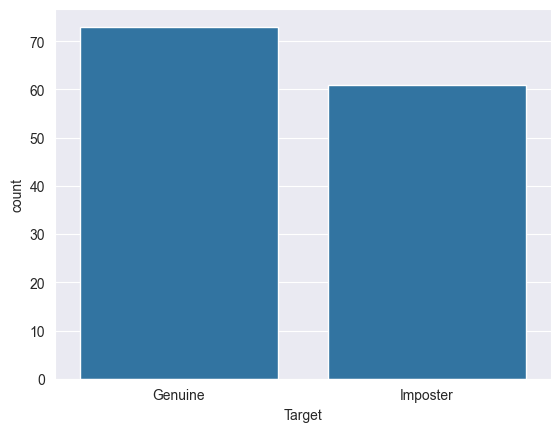

In [30]:
sns.set_style('darkgrid')
sns.countplot(x='Target',data=data)

**matching the count of genuine and imposter**

In [32]:
# Find the minimum class count
min_count = data['Target'].value_counts().min()

# Downsample "Genuine" to match "Imposter"
balanced = data.groupby('Target').sample(n=min_count, random_state=42)

# Check new counts
print(balanced['Target'].value_counts())
balanced.to_csv("balanced_keystrokes.csv", index=False)

Target
Genuine     61
Imposter    61
Name: count, dtype: int64


**load and exploring the balanced  data**

In [33]:
data = pd.read_csv(r"C:\Users\Admin\Desktop\Keystroke_analysis\KeystrokeLoggingApplication\src\balanced_keystrokes.csv", on_bad_lines='skip')
data.head()

,User,Target,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,Adithi,Genuine,0.170,0.744,0.574,0.135,0.904,0.769,0.151,0.774,...,0.176,0.427,0.251,0.209,0.482,0.273,0.161,0.755,0.594,0.140
1,Adithi,Genuine,0.101,0.387,0.286,0.131,0.313,0.182,0.139,0.412,...,0.151,0.216,0.065,0.170,0.191,0.021,0.100,0.281,0.181,0.115
2,Adithi,Genuine,0.152,1.060,0.908,0.086,0.378,0.292,0.161,0.337,...,0.162,0.197,0.035,0.186,0.317,0.131,0.135,0.835,0.700,0.160
3,Adithi,Genuine,0.151,1.296,1.145,0.161,0.453,0.292,0.176,2.750,...,0.131,1.367,1.236,0.186,1.564,1.378,0.123,0.608,0.485,0.151
4,Adithi,Genuine,0.130,0.593,0.463,0.125,0.861,0.736,0.157,0.426,...,0.141,0.342,0.201,0.161,0.276,0.115,0.107,0.268,0.161,0.130


In [34]:
data.columns

Index(['User', 'Target', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t',
       'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five',
       'UD.e.five', 'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r',
       'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a',
       'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l',
       'DD.l.Return', 'UD.l.Return', 'H.Return'],
      dtype='object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_15316\1816638351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=data, palette={'Genuine': 'royalblue', 'Imposter': 'orange'})


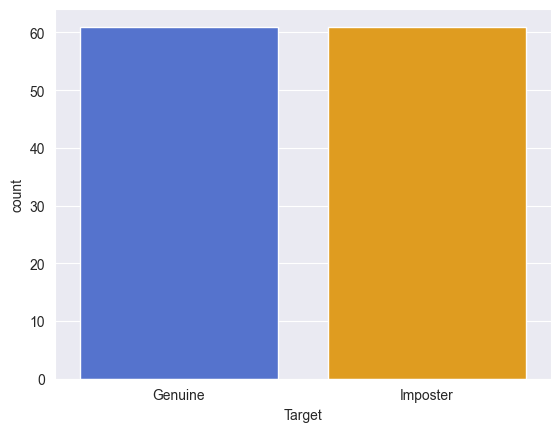

In [39]:
sns.set_style('darkgrid')
sns.countplot(x='Target', data=data, palette={'Genuine': 'royalblue', 'Imposter': 'orange'})
plt.show()

**Split data into train and test data**

In [44]:
train, test = train_test_split(data, test_size = 0.2)
features = list(data.columns[2:])  # Skip 'User' and 'Target'
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']

**Train model with training data.**

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [48]:
y_test.count()

np.int64(25)

**Predict Results**

[[10  2]
 [ 4  9]]


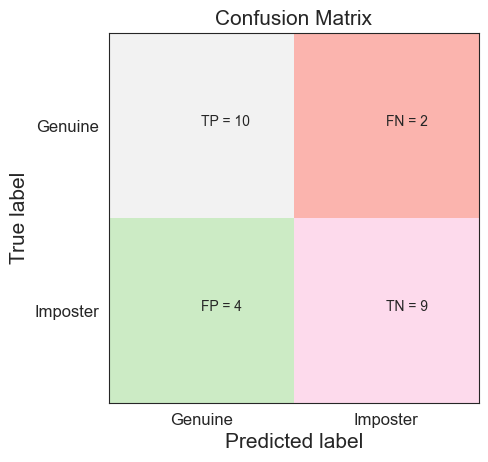

In [49]:
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)
sns.set_style('white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=12)
plt.yticks(tick_marks, classNames,fontsize=12)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [50]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Genuine       0.71      0.83      0.77        12
    Imposter       0.82      0.69      0.75        13

    accuracy                           0.76        25
   macro avg       0.77      0.76      0.76        25
weighted avg       0.77      0.76      0.76        25



In [51]:
model_accuracy = metrics.accuracy_score(y_test, pred)
print('Accuracy of Model is : ',model_accuracy)

Accuracy of Model is :  0.76


In [52]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

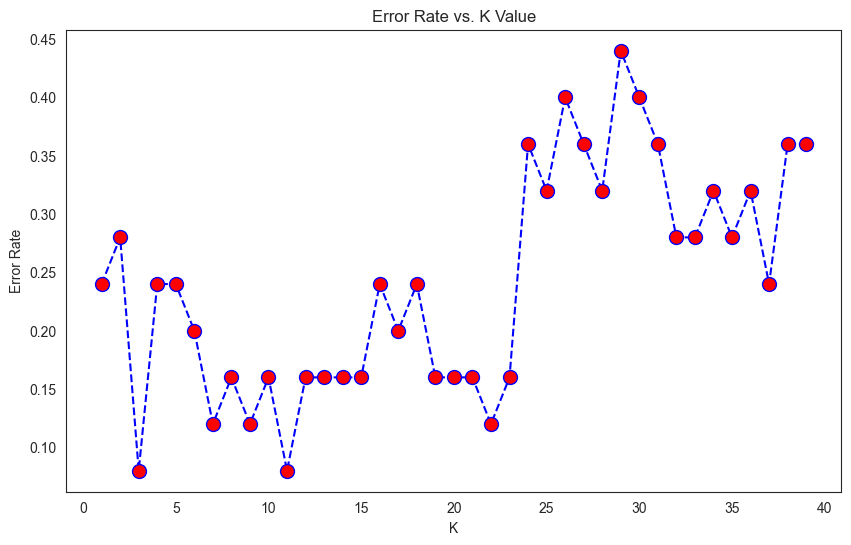

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [54]:
error_rate = []

# Will take some time
for i in range(1,70):
    train, test = train_test_split(data, test_size = 0.2, random_state=i)
    features = list(data.columns[1:32])
    X = data[features]
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

ValueError: could not convert string to float: 'Genuine'